In [5]:
!pip install kaggle

In [6]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [8]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:09<00:00, 11.9MB/s]
100% 163M/163M [00:09<00:00, 18.4MB/s]


In [9]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1595.jpg', 'with_mask_1602.jpg', 'with_mask_373.jpg', 'with_mask_2525.jpg', 'with_mask_1270.jpg']
['with_mask_3198.jpg', 'with_mask_2146.jpg', 'with_mask_842.jpg', 'with_mask_3042.jpg', 'with_mask_1585.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_88.jpg', 'without_mask_3523.jpg', 'without_mask_3146.jpg', 'without_mask_3069.jpg', 'without_mask_3643.jpg']
['without_mask_2626.jpg', 'without_mask_3229.jpg', 'without_mask_2778.jpg', 'without_mask_477.jpg', 'without_mask_448.jpg']


In [14]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [15]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [16]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [18]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

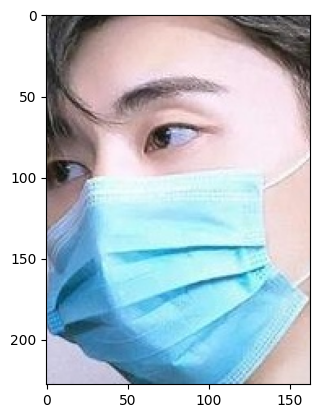

In [19]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

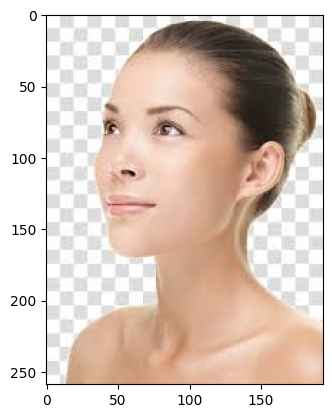

In [20]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [21]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [23]:
len(data)

7553

In [24]:
data[0]

array([[[250, 254, 248],
        [253, 254, 244],
        [250, 255, 251],
        ...,
        [123,  88,  57],
        [120,  85,  52],
        [115,  80,  45]],

       [[251, 254, 252],
        [252, 254, 247],
        [250, 255, 252],
        ...,
        [139, 104,  82],
        [135,  99,  76],
        [130,  94,  70]],

       [[253, 254, 255],
        [253, 254, 250],
        [249, 255, 253],
        ...,
        [116,  76,  89],
        [120,  79,  92],
        [114,  73,  86]],

       ...,

       [[254, 254, 253],
        [254, 255, 248],
        [255, 254, 253],
        ...,
        [  1,   2, 138],
        [  1,   1, 147],
        [  0,   1, 142]],

       [[254, 254, 252],
        [254, 255, 246],
        [255, 254, 251],
        ...,
        [  1,   2, 137],
        [  1,   1, 145],
        [  0,   1, 139]],

       [[254, 255, 252],
        [254, 255, 245],
        [255, 254, 249],
        ...,
        [  0,   1, 135],
        [  0,   1, 142],
        [  0,   1, 136]]

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(128, 128, 3)

In [27]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [29]:
type(Y)

numpy.ndarray

In [30]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [31]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [34]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [35]:
X_train[0]

array([[[191, 184, 156],
        [192, 185, 157],
        [193, 186, 158],
        ...,
        [212, 207, 188],
        [212, 207, 188],
        [213, 208, 189]],

       [[192, 185, 157],
        [192, 185, 157],
        [193, 186, 158],
        ...,
        [212, 207, 188],
        [212, 207, 188],
        [213, 208, 189]],

       [[193, 185, 157],
        [194, 186, 158],
        [195, 187, 159],
        ...,
        [213, 208, 189],
        [213, 208, 189],
        [213, 208, 189]],

       ...,

       [[ 13,  86, 126],
        [ 12,  86, 129],
        [  3,  77, 126],
        ...,
        [  1,  69, 163],
        [  3,  55, 140],
        [  1,  39, 117]],

       [[  0,  82, 133],
        [  1,  77, 130],
        [  3,  70, 127],
        ...,
        [  3,  59, 150],
        [  2,  43, 128],
        [  0,  42, 123]],

       [[  1,  78, 132],
        [  0,  69, 125],
        [  3,  65, 124],
        ...,
        [  0,  40, 126],
        [  0,  28, 114],
        [  4,  49, 134]]

In [36]:
X_train_scaled[0]

array([[[0.74901961, 0.72156863, 0.61176471],
        [0.75294118, 0.7254902 , 0.61568627],
        [0.75686275, 0.72941176, 0.61960784],
        ...,
        [0.83137255, 0.81176471, 0.7372549 ],
        [0.83137255, 0.81176471, 0.7372549 ],
        [0.83529412, 0.81568627, 0.74117647]],

       [[0.75294118, 0.7254902 , 0.61568627],
        [0.75294118, 0.7254902 , 0.61568627],
        [0.75686275, 0.72941176, 0.61960784],
        ...,
        [0.83137255, 0.81176471, 0.7372549 ],
        [0.83137255, 0.81176471, 0.7372549 ],
        [0.83529412, 0.81568627, 0.74117647]],

       [[0.75686275, 0.7254902 , 0.61568627],
        [0.76078431, 0.72941176, 0.61960784],
        [0.76470588, 0.73333333, 0.62352941],
        ...,
        [0.83529412, 0.81568627, 0.74117647],
        [0.83529412, 0.81568627, 0.74117647],
        [0.83529412, 0.81568627, 0.74117647]],

       ...,

       [[0.05098039, 0.3372549 , 0.49411765],
        [0.04705882, 0.3372549 , 0.50588235],
        [0.01176471, 0

**Building a Convolutional Neural Networks (CNN)**

In [37]:
import tensorflow as tf
from tensorflow import keras

In [38]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [39]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [40]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 14s 22ms/step - loss: 0.5267 - acc: 0.7889 - val_loss: 0.3059 - val_acc: 0.8694
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2770 - acc: 0.8887 - val_loss: 0.2428 - val_acc: 0.9140
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2149 - acc: 0.9180 - val_loss: 0.2698 - val_acc: 0.9140
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1703 - acc: 0.9358 - val_loss: 0.2582 - val_acc: 0.9157
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1495 - acc: 0.9441 - val_loss: 0.2547 - val_acc: 0.9124


**Model Evaluation**

In [41]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2487 - acc: 0.9087
Test Accuracy = 0.9086697697639465


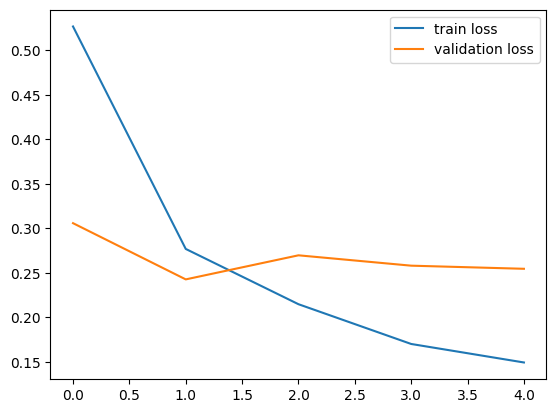

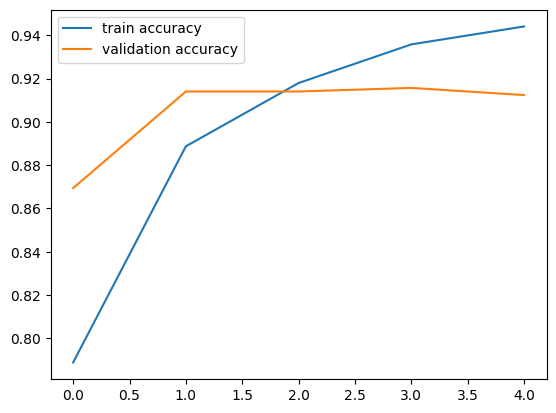

In [42]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/testm.jpg


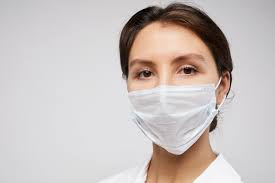

1/1 [==============================] - 0s 170ms/step
[[0.45225996 0.5220373 ]]
1
The person in the image is wearing a mask


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Path of the image to be predicted: /content/testnm.jpg


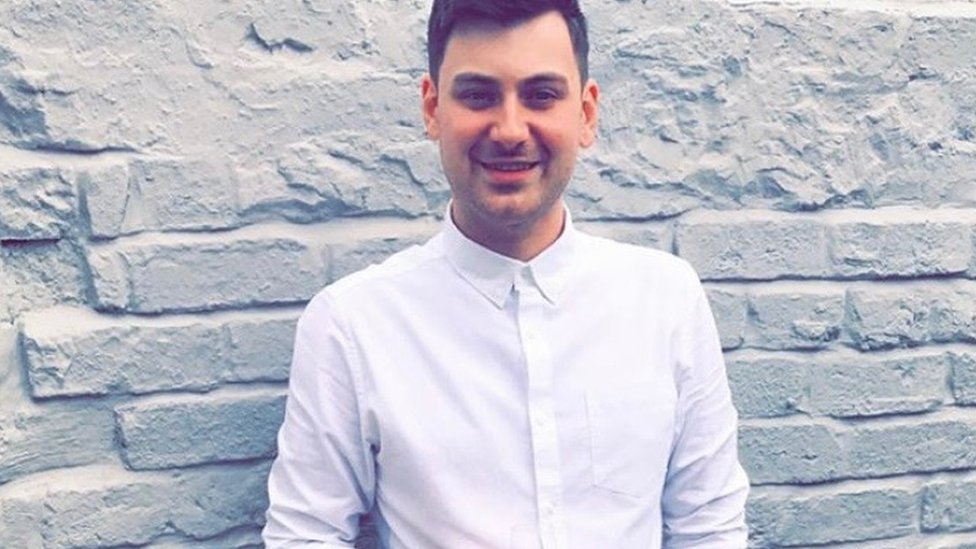

1/1 [==============================] - 0s 46ms/step
[[0.5271914 0.4853768]]
0
The person in the image is not wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')